# 🐼 Visualización con Pandas
---


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" alt="Drawing" style="width: 350px;"/>

Para mas información y detalles visite la documentación oficial:
 https://pandas.pydata.org/docs/user_guide/visualization.html

---
**Autores de la Notebook:** 


* [Matias Sanchez Gavier ](https://matias-online.netlify.app/)  🧛
*   [Matias Moris](https://www.linkedin.com/in/matias-moris-6041337b/) ⚽
* [Anotonio Marrazzo](https://www.linkedin.com/in/antonio-marrazzo-40b3491a2/) 🏆

 ---

## 💻 Accediendo Información 
---

### Jupyter

- Dentro de una función si apretan **shift + tab** da la documentación (no simpre, puede fallar).
- Para autocompletar  **tab**


### Google Colab

- En colab tienen que ejectuar **funcion?** y esto les da la documentación.
- Para autocompletar es **cntrl + spacio**

### Recomendación General

- Visitar las páginas oficiales de las librerias.
- Buscar en google (en inglés)

En general la documentación tiene la posta, pero puede ser díficil de entender si no estas entrenado.


## 📚 Librerias
---

Para realizar gráficos vamos a usar dos librerias **matplotlib** y **Seaborn**. 

En este caso no vamos a hacer gráficos directamente con matplotlib, sin no que vamos a utilizar la extensión con **Pandas**.

In [1]:
import pandas as pd  # Manejo de Datos
import numpy as np # Arrays
import matplotlib.pyplot as plt # Gráficos general 
import seaborn as sns
from pandas_datareader import data; # Obtener Datos


# titanic data set
df1 = sns.load_dataset("titanic")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 📉  Tipos de Gráficos
---
Hay varios métodos construidos en pandas para hacer gráficos estadísticos. Vamos a hacer la distinción entre variables Discretas (toman pocos valores) y continuas (toman muchos valores).  

🔴  **Variables Discretas**


* df.plot.barh 
* df.plot.bar 

---

🔵 **Variables Continuas**

- **Gráficos de Distribución**
 - df.plot.density 
 - df.plot.hist     
 - df.plot.box   

- **Relación entre variables**
 - df.plot.scatter

- **Series De tiempo**
 - df.plot.line     


    

## 📋 Análisis NaN
---

In [ ]:
df1.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

Opciones para **tratar NA**:

- Reemplazar valores desconocidos (fill)
- Eliminar Columnas
- Eleminar Filas


In [ ]:
# AGE
df1["age"] = df1["age"].fillna(df1["age"].mean()) # Reemplazo por la media

#Deck
df1.drop("deck",axis=1,inplace=True) # Elimino Columna

# FARE &  emark_town
df1.dropna(inplace=True) # Elimino Filas

# Checkeamos 
df1.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

##  🔴  Gráficos de  Variables Discretas 
---

**Variable Discreta:** Toma pocos valores.


**Gráficos:**
- plot.bar()
- plot.barh()

**Ejemplos del Titanic Data Set**
- Sex
- Survived
- Pclass
- SibSp
- Embarked

### 📊 Gráficos de Barra
---
**¿Cuánta Gente hay en cada Clase?**



In [ ]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [3]:
graph = df1.groupby("class").count()["age"]
graph.head()

class
First     186
Second    173
Third     355
Name: age, dtype: int64

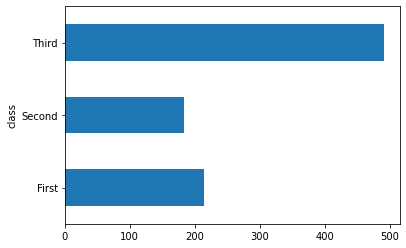

In [ ]:
graph.plot(kind="barh")

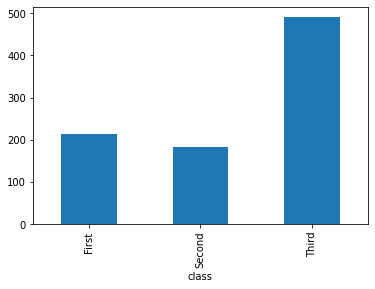

In [ ]:
graph.plot(kind="bar")

**¿Cuántos Sobrevivieron?**


In [ ]:
df1.groupby("survived").count()["class"]

survived
0    549
1    340
Name: class, dtype: int64

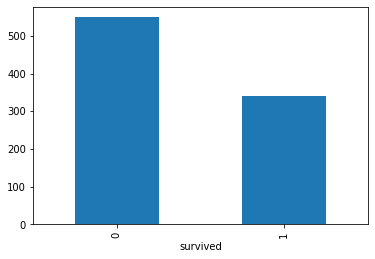

In [ ]:
df1.groupby("survived").count()["class"].plot(kind="bar")

###  🧮 Profundizando en los parámetros
---
Viendo la documentación uno puede ver muchas de las formas de mejorar los gráficos.

Algunos parámetros interesantes:

- figsize  -> tamaño de la figura
- linewidth -> tamaño de la linea 
- color -> color
- edgecolor  -> color de los bordes

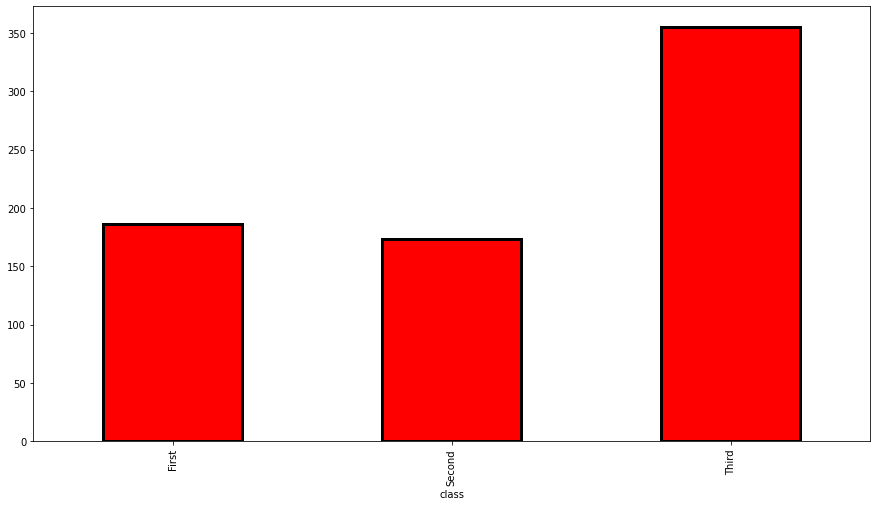

In [5]:
graph.plot(kind="bar", figsize=(15,8), color ="red", edgecolor="black", linewidth=3)

### 🔮  Técnicas Generales para Gráficos con Matplotlib
---
Hay ciertas funciones asociados con Matplotlib que se usan en las  mayorías de los gráficos:


- plt.title()
- plt.xlabel()
- plt.ylabel()
- plt.legend()


Aplicamos algunas con el ejemplo anterior.

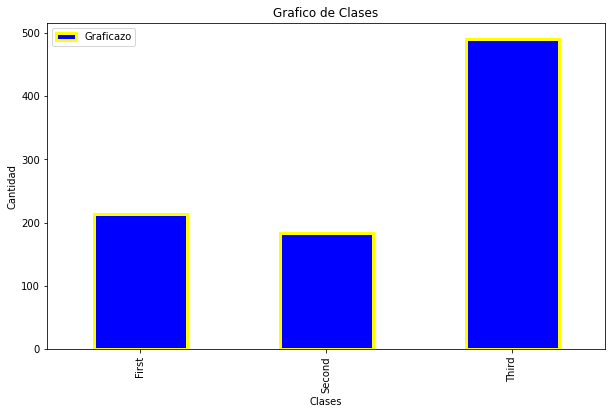

In [ ]:
graph.plot(kind="bar", figsize=(10,6), color ="blue", edgecolor="yellow", linewidth=3, label="Graficazo")

plt.title("Grafico de Clases")
plt.xlabel("Clases")
plt.ylabel("Cantidad")
plt.legend()


Cada una de las funciones que mencionamos anteriormente tienen parámetros asociados, veamos algunos ejemplos.

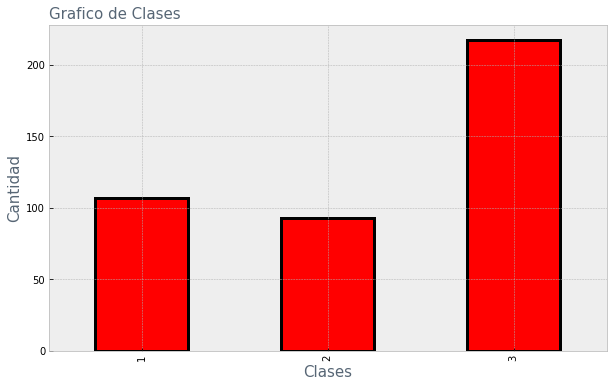

In [ ]:
graph.plot(kind="bar", figsize=(10,6), color ="red", edgecolor="black", linewidth=3)

plt.title("Grafico de Clases", fontdict={'fontsize':15, 'color' : "#576675"}, loc='left' )
plt.xlabel("Clases", fontdict={'fontsize':15, 'color' : "#576675"})
plt.ylabel("Cantidad", fontdict={'fontsize':15, 'color' : "#576675"});

## 🔵  Gráficos Variables Continuas
---
Algunos de los principales gráficos son: 

**Gráficos de Distribución**
* df.plot.density 
* df.plot.hist     
* df.plot.box   

**Relación entre variables**
* df.plot.scatter

**Series De tiempo**
* df.plot.line     


### 🛸 Gráficos de Distribución
---
- df.plot.density
- df.plot.hist
- df.plot.box

#### Función de Densidad
----

In [13]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


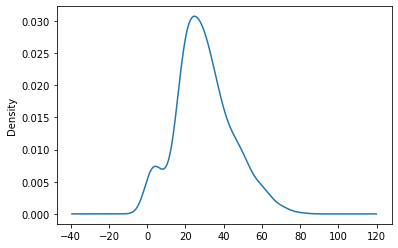

In [15]:
# Kernel Density Estimation 
df1["age"].plot(kind="density")

#### Histograma
----

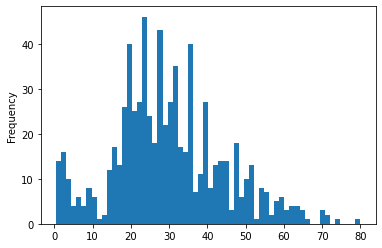

In [16]:
# Histograma
df1["age"].plot(kind="hist", bins=60)

#### Multiples Gráficos
---
Para poner multiples gráficos podemos usar **plt.subplot(filas, columnas, posicion)**.

Para entender mejor la **estructura de los gráficos** puede observar este gráfico:

<img src="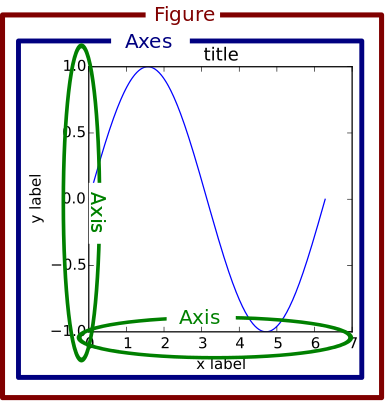%0A" alt="Girl in a jacket" width="200" height="150">


**Estructura de los Gráficos:**
- Figure, es la figura contiene todo
- Axes, es cada subplot, cada gráfico
- axis, hace referencia a los ejes

Para generar multiples Axes usamos **plt.subplots(fila, columna, indice)**

Text(0.5, 1.0, 'Histograma, 60 bins')

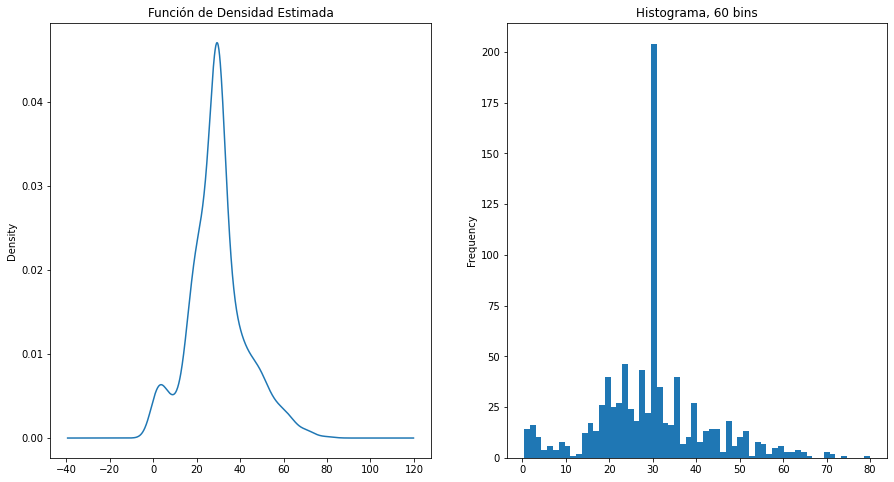

In [ ]:
# Indicamos el tamaño de la figura
plt.figure(figsize=(15,8))

# Densidad
plt.subplot(1,2,1)
df1["age"].plot(kind="density")
plt.title("Función de Densidad Estimada")


# Histograma
plt.subplot(1,2,2)
df1["age"].plot(kind="hist", bins=60)
plt.title("Histograma, 60 bins")

#### Box- Plot
----

In [ ]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


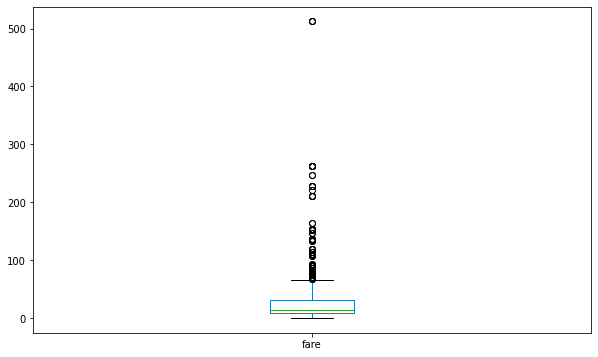

In [ ]:
plt.figure(figsize=(10,6))
df1.fare.plot(kind="box")

Text(0.5, 1.0, 'Histograma, 60 bins')

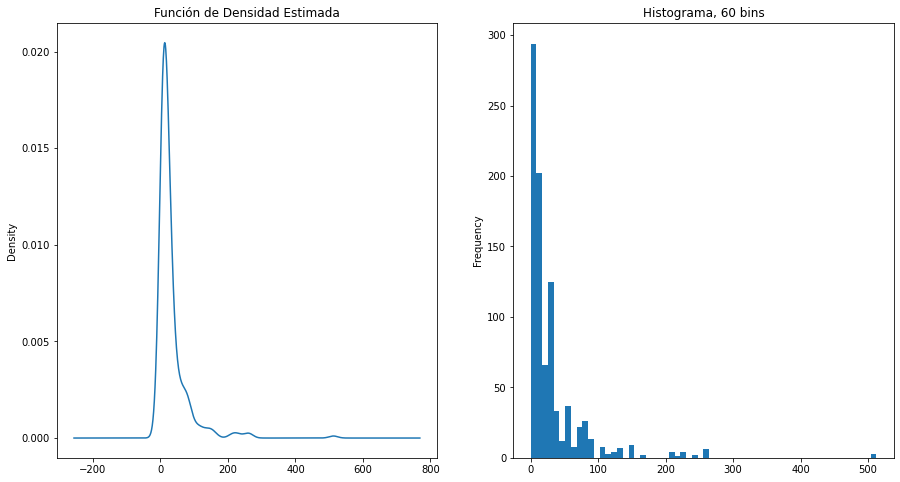

In [ ]:
# Indicamos el tamaño de la figura
plt.figure(figsize=(15,8))

# Densidad
plt.subplot(1,2,1)
df1["Fare"].plot(kind="density")
plt.title("Función de Densidad Estimada")


# Histograma
plt.subplot(1,2,2)
df1["Fare"].plot(kind="hist", bins=60)
plt.title("Histograma, 60 bins")


### 📈  Gráfico de Linea 
---
Este tipo de gráfico sirve para ver la relación entre dos variables (en general **la correlación**).

In [ ]:
df2 = pd.read_csv("YPF.csv",skiprows=2, sep=";", parse_dates=True, index_col="Fecha Cotización")
df2.head()

,Apertura,Máximo,Mínimo,Cierre,Cierre ajustado,Volumen Monto,Volumen Nominal
Fecha Cotización,,,,,,,
2020-06-26,619.00,622.95,600.00,608.85,608.85,"64,246,839.75","104,830.00"
2020-06-25,605.05,625.00,600.15,618.45,618.45,"62,791,109.15","102,732.00"
2020-06-24,608.95,611.00,591.00,597.90,597.90,"66,405,588.45","110,467.00"
2020-06-23,613.05,624.90,608.65,611.10,611.10,"125,013,430.75","202,079.00"
2020-06-22,618.00,618.00,588.00,608.65,608.65,"207,277,304.60","343,731.00"


In [ ]:
# Seleccionamos entre 2010 y 2014
x = df2.loc[(df2.index > "2010-01-1")  & (df2.index < "2014-12-31") , "Cierre"]
x.head()

Fecha Cotización
2014-12-30    315.0
2014-12-29    303.0
2014-12-26    290.0
2014-12-23    290.0
2014-12-22    287.0
Name: Cierre, dtype: float64

Text(0.5, 1.0, 'Cierre Acciones YPF (2010 - 2014)')

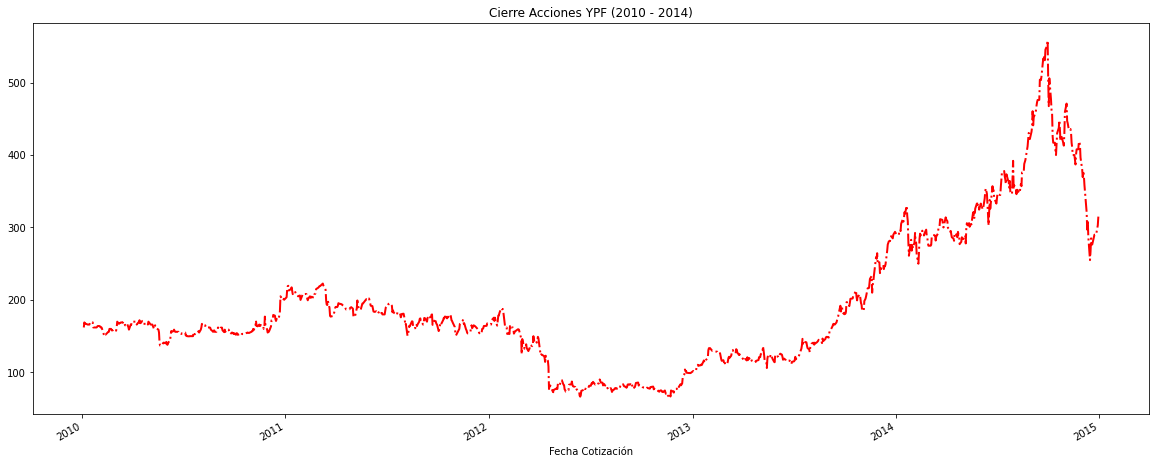

In [ ]:
plt.figure(figsize=(20,8))
x.plot(kind="line", ls='-.', c='red', lw='2')
plt.title("Cierre Acciones YPF (2010 - 2014)")

### ♟️ Scatter Plots (Gráfico de Puntos)

---

Ambas variables x, y deben de ser continuas

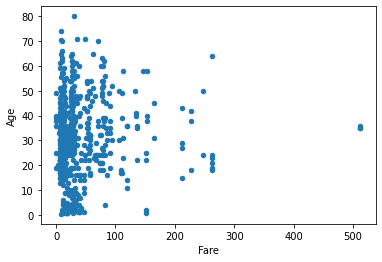

In [ ]:
df1.plot(kind="scatter", x="Fare", y="Age")